# Testing Integrator Functions Without Leapfrog/Sympletic Methods

Unless stated otherwise, length = AU and time = yr

# Initial Setup

In [2]:
#!gcc -shared -O2 -fPIC ode.c -o libode.so

In [3]:
import ctypes
from ctypes import *
from numpy.ctypeslib import ndpointer
import numpy as np
import matplotlib.pyplot as plt
import numba
import math

In [4]:
from odesolver import *
from helpers import *
from interfunc import *

# func_2_body mercury testing

In [5]:
GM_S = 39.4229 #AU^3.yr^{-2} solar mass parameter

a_0 = 0.39
e_0 = 0.206
theta_E_0 = -3*np.pi/4
theta_0 = theta_E_0
x_0,v_x_0,y_0,v_y_0 = ellipse_to_xy(a_0, e_0, theta_0, theta_E_0, GM_S)
initial_mercury = [x_0,v_x_0,y_0,v_y_0]

In [6]:
total_time = 10*orbital_period(a_0,GM_S)
step_size = orbital_period(a_0,GM_S)/400
n_steps = int(total_time/step_size)
t,sol = solve_ode(func_2_body,[0.,total_time], n_steps, initial_mercury, args=[GM_S], method="RK4")
x,v_x,y,v_y = sol.T

Text(0.5, 1.0, 'Mercury Orbiting Sun Alone (10 orbital periods)')

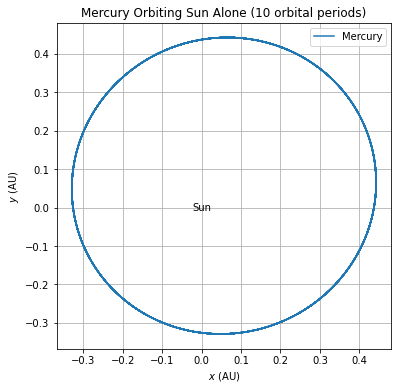

In [7]:
plt.figure(figsize=(6,6))
plt.plot(x,y,label=r"Mercury")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Mercury Orbiting Sun Alone (10 orbital periods)")

# func_n_body solar system testing

In [8]:
GM_Sun = 39.4229 #AU^3.yr^{-2} solar mass parameter

# Earth's standard gravitational parameter
GM_Ear = 0.00011841685 #AU^3/yr^2

# https://nssdc.gsfc.nasa.gov/planetary/factsheet/planet_table_ratio.html
GM_Mer = GM_Ear*0.0553
GM_Ven = GM_Ear*0.815
GM_Mar = GM_Ear*0.107
GM_Jup = GM_Ear*317.8
GM_Sat = GM_Ear*95.2
GM_Ura = GM_Ear*14.5
GM_Nep = GM_Ear*17.1

In [9]:
# https://www.princeton.edu/~willman/planetary_systems/Sol/
init_Mer = [ellipse_to_xy(0.3870993, 0.20564, 0, 0, GM_Sun)]
init_Ven = [ellipse_to_xy(0.723336, 0.00678, 0, 0, GM_Sun)]
init_Ear = [ellipse_to_xy(1.000003, 0.01671, 0, 0, GM_Sun)]
init_Mar = [ellipse_to_xy(1.52371, 0.09339, 0, 0, GM_Sun)]
init_Jup = [ellipse_to_xy(5.2029, 0.0484, 0, 0.01, GM_Sun)]
init_Sat = [ellipse_to_xy(9.537, 0.0539, 0, 0, GM_Sun)]
init_Ura = [ellipse_to_xy(19.189, 0.04726, 0, 0, GM_Sun)]
init_Nep = [ellipse_to_xy(30.0699, 0.00859, 0, 0, GM_Sun)]
init_Mer + init_Ven + init_Ear + init_Mar + init_Jup + init_Sat + init_Ura + init_Nep

[(0.3074961999479999, 7.612794171411826e-16, 0.0, 12.432636375993715),
 (0.71843178192, 1.1075642275311855e-07, 0.0, 7.432737681122688),
 (0.9832929498699999, 3.909419052539245e-16, 0.0, 6.3845658278960675),
 (1.3814107231, 3.420434494790918e-16, 0.0, 5.585993442635636),
 (4.951091068405702, 0.0013338252833467459, 0.0, 2.8892613750599763),
 (9.0229557, 1.313954812655727e-16, 0.0, 2.145851054476366),
 (18.28212786, 9.2017202826627e-17, 0.0, 1.502754963973171),
 (29.811599558999994, 7.071634887307157e-17, 0.0, 1.1548856196301993)]

In [10]:
n_planets = 8
params = [GM_Sun, n_planets, GM_Mer, GM_Ven, GM_Ear, GM_Mar, GM_Jup, GM_Sat, GM_Ura, GM_Nep]
init_solar_planets = sum((init_Mer + init_Ven + init_Ear + init_Mar + init_Jup + init_Sat + init_Ura + init_Nep),())

a_Nep = 30.0699
total_time = orbital_period(a_Nep,GM_S) # 1 Neptune period
step_size = orbital_period(a_0,GM_S)/100 # 1/100 of Mercury period
n_steps = int(total_time/step_size)
t,sol_untransposed = solve_ode(func_n_body,[0.,total_time], n_steps, init_solar_planets, args=params, method="RK4")
sol = sol_untransposed.T

Text(0.5, 1.0, 'All Planets (1 Neptune period)')

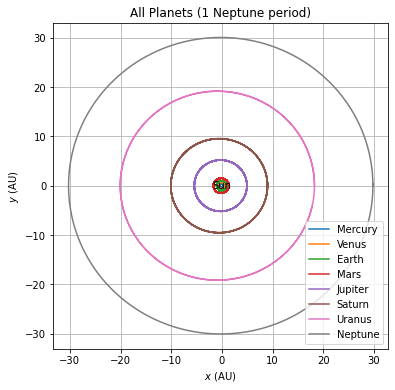

In [11]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Mercury")
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Venus")
plt.plot(sol[ind_x(2)],sol[ind_y(2)],label=r"Earth")
plt.plot(sol[ind_x(3)],sol[ind_y(3)],label=r"Mars")
plt.plot(sol[ind_x(4)],sol[ind_y(4)],label=r"Jupiter")
plt.plot(sol[ind_x(5)],sol[ind_y(5)],label=r"Saturn")
plt.plot(sol[ind_x(6)],sol[ind_y(6)],label=r"Uranus")
plt.plot(sol[ind_x(7)],sol[ind_y(7)],label=r"Neptune")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"All Planets (1 Neptune period)")

Text(0.5, 1.0, 'Inner Planets (1 Neptune period)')

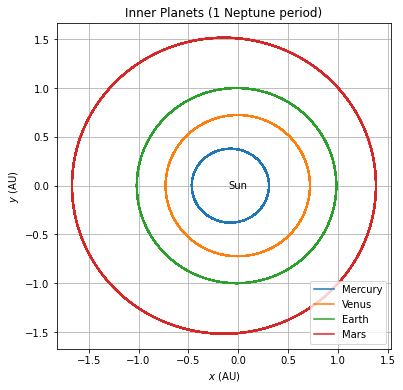

In [12]:
plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Mercury")
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Venus")
plt.plot(sol[ind_x(2)],sol[ind_y(2)],label=r"Earth")
plt.plot(sol[ind_x(3)],sol[ind_y(3)],label=r"Mars")
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Inner Planets (1 Neptune period)")

 # other func_n_body test

Text(0.5, 1.0, 'Misc Planets (1 Neptune period)')

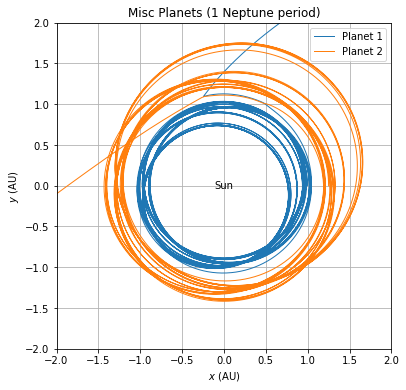

In [70]:
init_1 = [ellipse_to_xy(1, 0, 0, 0, GM_Sun)]
init_2 = [ellipse_to_xy(1.25, 0, 0, 0, GM_Sun)]

n_misc = 2
params_misc = [GM_Sun, n_misc, GM_Jup, GM_Jup]
init_misc = sum((init_1 + init_2),())

total_time = 0.25*orbital_period(a_Nep,GM_S) # 0.25 Neptune period
step_size = orbital_period(a_0,GM_S)/100 # 1/100 of Mercury period
n_steps = int(total_time/step_size)
t,sol_untransposed = solve_ode(func_n_body,[0.,total_time], n_steps, init_misc, args=params_misc, method="RK4")
sol = sol_untransposed.T

plt.figure(figsize=(6,6))
plt.plot(sol[ind_x(0)],sol[ind_y(0)],label=r"Planet 1",linewidth=1)
plt.plot(sol[ind_x(1)],sol[ind_y(1)],label=r"Planet 2",linewidth=1)
plt.xlim(-2,2)
plt.ylim(-2,2)
plt.legend()
plt.grid()
plt.xlabel(r"$x$ (AU)")
plt.ylabel(r"$y$ (AU)")
plt.text(0,0,"Sun",ha="center",va="center")
plt.title(r"Misc Planets (1 Neptune period)")